# COMP9517 Group Project

### JungAn Lin  z5458019@ad.unsw.edu.au z5458019


### 80/20 Train-Test Split and CSV Storage

### Balance dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data.csv')
train_data, test_data = train_test_split(
    data, train_size=0.8, random_state=42, stratify=data['class_id'])
train_data.to_csv('train_data.csv', index=False, encoding='utf-8')
test_data.to_csv('test_data.csv', index=False, encoding='utf-8')
print('Done!')

print('Number of samples:', data.shape[0])
print('Number of training samples:', train_data.shape[0])
print('Number of testing samples:', test_data.shape[0])
print('Verify the sample distribution')
print('The class values:', set(map(int, test_data.class_id.values)))
print('The distribution of train data:',
      np.bincount(train_data.class_id.values))
print('The distribution of test data:',
      np.bincount(test_data.class_id.values))


Done!
Number of samples: 12000
Number of training samples: 9600
Number of testing samples: 2400
Verify the sample distribution
The class values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
The distribution of train data: [640 640 640 640 640 640 640 640 640 640 640 640 640 640 640]
The distribution of test data: [160 160 160 160 160 160 160 160 160 160 160 160 160 160 160]


### K-Nearest Neighbors (KNN) Classification  
### Augmentation: None

accuracy: 20.62%


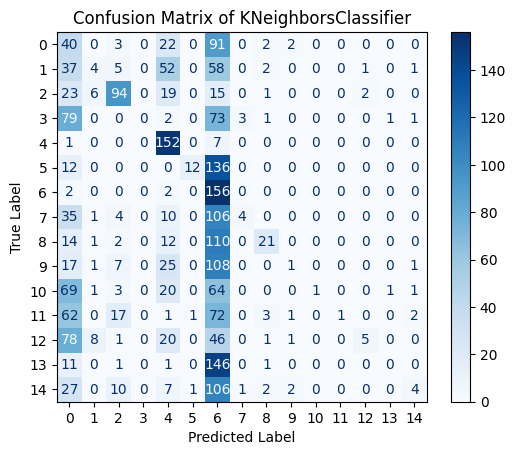

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.25      0.12       160
           1       0.18      0.03      0.04       160
           2       0.64      0.59      0.61       160
           3       0.00      0.00      0.00       160
           4       0.44      0.95      0.60       160
           5       0.86      0.07      0.14       160
           6       0.12      0.97      0.21       160
           7       0.50      0.03      0.05       160
           8       0.62      0.13      0.22       160
           9       0.14      0.01      0.01       160
          10       1.00      0.01      0.01       160
          11       1.00      0.01      0.01       160
          12       0.62      0.03      0.06       160
          13       0.00      0.00      0.00       160
          14       0.40      0.03      0.05       160

    accuracy                           0.21      2400
   macro avg       0.44      0.21      0.14      2400
wei

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data.csv')
X_test, y_test = load_data('test_data.csv')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of KNeighborsClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Decision Tree (DT) Classification  
### Augmentation: None

accuracy: 25.67%


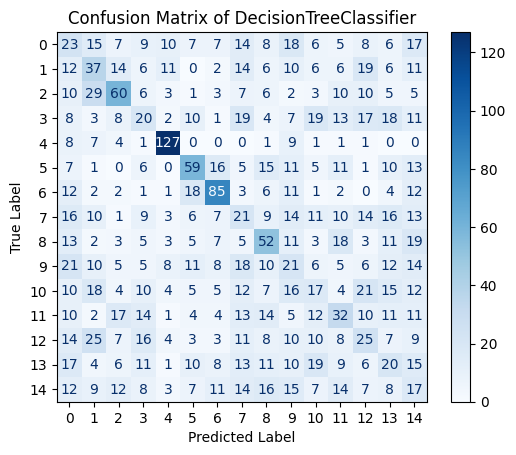

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.14      0.13       160
           1       0.21      0.23      0.22       160
           2       0.40      0.38      0.39       160
           3       0.16      0.12      0.14       160
           4       0.70      0.79      0.74       160
           5       0.40      0.37      0.39       160
           6       0.51      0.53      0.52       160
           7       0.12      0.13      0.13       160
           8       0.30      0.33      0.31       160
           9       0.12      0.13      0.13       160
          10       0.13      0.11      0.12       160
          11       0.22      0.20      0.21       160
          12       0.17      0.16      0.16       160
          13       0.13      0.12      0.13       160
          14       0.09      0.11      0.10       160

    accuracy                           0.26      2400
   macro avg       0.25      0.26      0.25      2400
wei

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data.csv')
X_test, y_test = load_data('test_data.csv')

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of DecisionTreeClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Random Forest Classification  
### Augmentation: None

accuracy: 45.38%


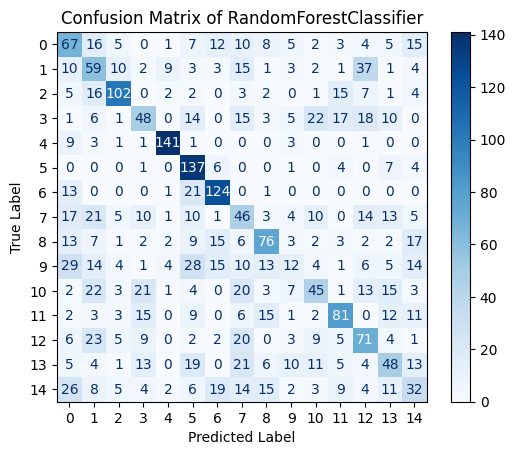

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.42      0.37       160
           1       0.29      0.37      0.33       160
           2       0.70      0.64      0.67       160
           3       0.38      0.30      0.33       160
           4       0.86      0.88      0.87       160
           5       0.50      0.86      0.63       160
           6       0.63      0.78      0.69       160
           7       0.25      0.29      0.27       160
           8       0.52      0.47      0.50       160
           9       0.20      0.07      0.11       160
          10       0.40      0.28      0.33       160
          11       0.56      0.51      0.53       160
          12       0.39      0.44      0.42       160
          13       0.36      0.30      0.33       160
          14       0.26      0.20      0.23       160

    accuracy                           0.45      2400
   macro avg       0.44      0.45      0.44      2400
wei

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data.csv')
X_test, y_test = load_data('test_data.csv')

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of RandomForestClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Convolutional Neural Network (CNN) Classification using Pytorch
### Augmentation: None

Epoch 1/5, Loss: 2.0821
Epoch 2/5, Loss: 1.4923
Epoch 3/5, Loss: 1.1718
Epoch 4/5, Loss: 0.9420
Epoch 5/5, Loss: 0.7329
Test Accuracy: 0.6896


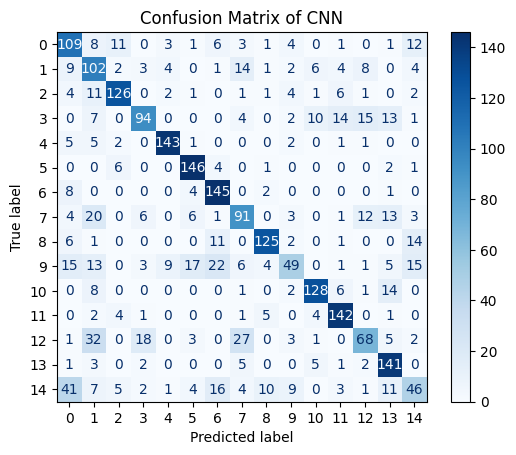

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.68      0.60       160
           1       0.47      0.64      0.54       160
           2       0.81      0.79      0.80       160
           3       0.73      0.59      0.65       160
           4       0.88      0.89      0.89       160
           5       0.80      0.91      0.85       160
           6       0.70      0.91      0.79       160
           7       0.58      0.57      0.57       160
           8       0.83      0.78      0.81       160
           9       0.60      0.31      0.40       160
          10       0.83      0.80      0.81       160
          11       0.78      0.89      0.83       160
          12       0.62      0.42      0.50       160
          13       0.68      0.88      0.77       160
          14       0.46      0.29      0.35       160

    accuracy                           0.69      2400
   macro avg       0.69      0.69      0.68      2400
wei

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from PIL import Image
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


image_size = (256, 256)
num_classes = 15
batch_size = 16
epochs = 5
device = torch.device("cpu")

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


def load_data(csv_file):
  data = pd.read_csv(csv_file)
  features = []
  labels = []

  for _, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size).convert("RGB")
      image_array = transform(image)

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return torch.stack(features), torch.tensor(labels, dtype=torch.long)


X_train, y_train = load_data('train_data.csv')
X_test, y_test = load_data('test_data.csv')

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(
        128 * (image_size[0] // 8) * (image_size[1] // 8), 128)
    self.fc2 = nn.Linear(128, num_classes)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))
    x = torch.flatten(x, start_dim=1)
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x


model = CNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
  model.train()
  total_loss = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
all_preds, all_labels = [], []

with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    max_values, predicted = torch.max(outputs, 1)

    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of CNN")
plt.show()

report = classification_report(all_labels, all_preds, zero_division=0)
print("Classification Report:")
print(report)


### K-Nearest Neighbors (KNN) Classification  
### Augmentation: SIFT

Accuracy: 58.48%


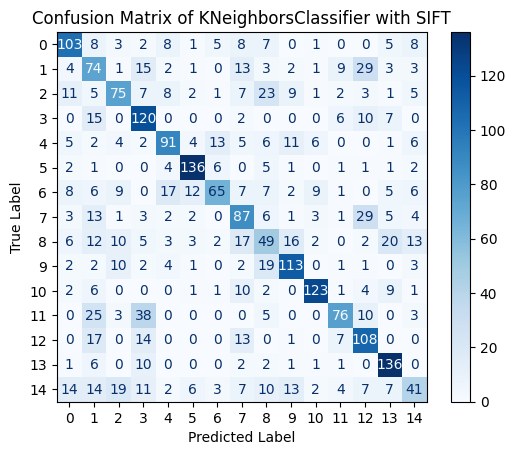

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       159
           1       0.36      0.46      0.40       160
           2       0.56      0.47      0.51       160
           3       0.52      0.75      0.62       160
           4       0.65      0.58      0.61       156
           5       0.80      0.85      0.83       160
           6       0.68      0.42      0.52       154
           7       0.48      0.54      0.51       160
           8       0.34      0.31      0.32       160
           9       0.66      0.71      0.68       160
          10       0.83      0.77      0.80       160
          11       0.69      0.47      0.56       160
          12       0.53      0.68      0.59       160
          13       0.68      0.85      0.76       160
          14       0.43      0.26      0.32       160

    accuracy                           0.58      2389
   macro avg       0.59      0.58      0.58      2389
wei

In [4]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


def extract_sift_features(image_path):
  try:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
      print(f"Error: Unable to read image {image_path}")
      return None

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)

    return descriptors

  except Exception as e:
    print(f"Error processing {image_path}: {e}")
    return None


def load_data_with_sift(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for _, row in data.iterrows():
    image_path = row['path_name']
    descriptors = extract_sift_features(image_path)

    if descriptors is not None:
      features.append(np.mean(descriptors, axis=0))
      labels.append(row['class_id'])

  return np.array(features), np.array(labels)


X_train, y_train = load_data_with_sift('train_data.csv')
X_test, y_test = load_data_with_sift('test_data.csv')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of KNeighborsClassifier with SIFT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)
print("Classification Report:")
print(report)


### Decision Tree (DT) Classification  
### Augmentation: SIFT

Accuracy: 42.86%


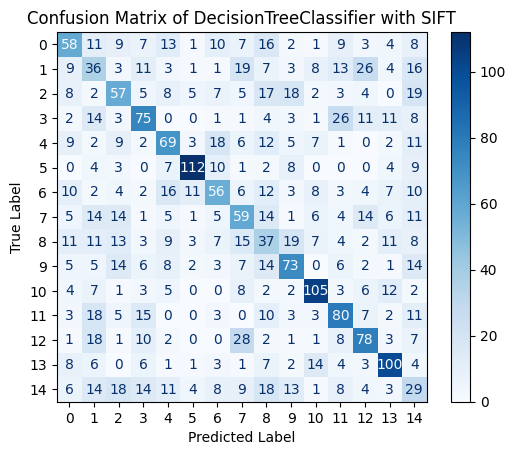

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       159
           1       0.22      0.23      0.22       160
           2       0.37      0.36      0.36       160
           3       0.47      0.47      0.47       160
           4       0.44      0.44      0.44       156
           5       0.78      0.70      0.74       160
           6       0.42      0.36      0.39       154
           7       0.34      0.37      0.36       160
           8       0.21      0.23      0.22       160
           9       0.47      0.46      0.46       160
          10       0.64      0.66      0.65       160
          11       0.47      0.50      0.48       160
          12       0.48      0.49      0.48       160
          13       0.59      0.62      0.61       160
          14       0.17      0.18      0.18       160

    accuracy                           0.43      2389
   macro avg       0.43      0.43      0.43      2389
wei

In [5]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


def extract_sift_features(image_path):
  try:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
      print(f"Error: Unable to read image {image_path}")
      return None

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)

    return descriptors

  except Exception as e:
    print(f"Error processing {image_path}: {e}")
    return None


def load_data_with_sift(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']
    descriptors = extract_sift_features(image_path)

    if descriptors is not None:
      features.append(np.mean(descriptors, axis=0))
      labels.append(row['class_id'])

  return np.array(features), np.array(labels)


X_train, y_train = load_data_with_sift('train_data.csv')
X_test, y_test = load_data_with_sift('test_data.csv')

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of DecisionTreeClassifier with SIFT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)
print("Classification Report:")
print(report)


### Random Forest Classification  
### Augmentation: SIFT

accuracy: 63.50%


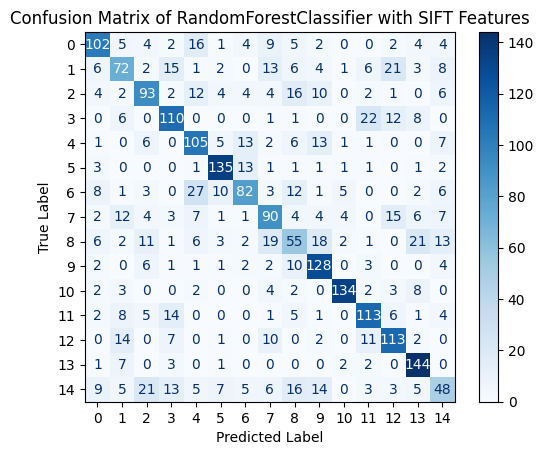

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       160
           1       0.53      0.45      0.48       160
           2       0.60      0.58      0.59       160
           3       0.64      0.69      0.66       160
           4       0.57      0.66      0.61       160
           5       0.79      0.84      0.82       160
           6       0.65      0.51      0.57       160
           7       0.55      0.56      0.55       160
           8       0.40      0.34      0.37       160
           9       0.65      0.80      0.72       160
          10       0.89      0.84      0.86       160
          11       0.68      0.71      0.69       160
          12       0.64      0.71      0.67       160
          13       0.70      0.90      0.79       160
          14       0.44      0.30      0.36       160

    accuracy                           0.64      2400
   macro avg       0.63      0.64      0.63      2400
wei

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

image_size = (256, 256)


def extract_sift_features(image_path):
  try:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
      raise ValueError(f"Image not found or cannot be opened: {image_path}")

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)

    if descriptors is None:
      return np.zeros(128)

    return np.mean(descriptors, axis=0)

  except Exception as e:
    print(f"Error extracting SIFT features from {image_path}: {e}")
    return np.zeros(128)


def load_data_with_sift(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for _, row in data.iterrows():
    image_path = row['path_name']

    try:
      sift_features = extract_sift_features(image_path)
      features.append(sift_features)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  if len(features) == 0 or len(labels) == 0:
    raise ValueError(
        "No valid data was loaded. Check your CSV and image files.")

  return np.array(features), np.array(labels)


X_train, y_train = load_data_with_sift('train_data.csv')
X_test, y_test = load_data_with_sift('test_data.csv')

forest = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of RandomForestClassifier with SIFT Features")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Convolutional Neural Network (CNN) Classification using Pytorch  
### Augmentation: SIFT

C:\Users\09a012\AppData\Local\Temp\ipykernel_11516\1937018733.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sift_tensor = torch.tensor(sift_features, dtype=torch.float32)
C:\Users\09a012\AppData\Local\Temp\ipykernel_11516\1937018733.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sift_tensor = torch.tensor(sift_features, dtype=torch.float32)


Epoch 1/1, Loss: 2.5921
Test Accuracy: 0.1267


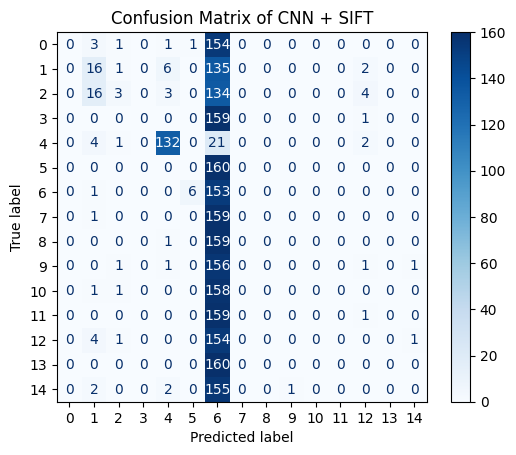

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.33      0.10      0.15       160
           2       0.33      0.02      0.04       160
           3       0.00      0.00      0.00       160
           4       0.90      0.82      0.86       160
           5       0.00      0.00      0.00       160
           6       0.07      0.96      0.13       160
           7       0.00      0.00      0.00       160
           8       0.00      0.00      0.00       160
           9       0.00      0.00      0.00       160
          10       0.00      0.00      0.00       160
          11       0.00      0.00      0.00       160
          12       0.00      0.00      0.00       160
          13       0.00      0.00      0.00       160
          14       0.00      0.00      0.00       160

    accuracy                           0.13      2400
   macro avg       0.11      0.13      0.08      2400
wei

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

image_size = (256, 256)
num_classes = 15
batch_size = 16
epochs = 1
device = torch.device("cpu")

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def extract_sift_features(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Unable to read image {image_path}")
            return torch.zeros(128, dtype=torch.float32) 

        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(image, None)

        if descriptors is None:
            return torch.zeros(128, dtype=torch.float32)  

        descriptors = descriptors.flatten()
        sift_features = descriptors[:128]  

        return torch.tensor(sift_features, dtype=torch.float32)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return torch.zeros(128, dtype=torch.float32)  
 

def load_data(csv_file):
    data = pd.read_csv(csv_file)
    features = []
    labels = []

    for _, row in data.iterrows():
        image_path = row['path_name']

        try:
            image = Image.open(image_path).resize(image_size).convert("RGB")
            image_array = transform(image)

            sift_features = extract_sift_features(image_path)
            sift_tensor = torch.tensor(sift_features, dtype=torch.float32)

            combined_features = torch.cat((image_array.flatten(), sift_tensor))

            features.append(combined_features)
            labels.append(row['class_id'])

        except Exception as e:
            print(f"Can't handle file: {image_path}, error: {e}")

    return torch.stack(features), torch.tensor(labels, dtype=torch.long)

X_train, y_train = load_data('train_data.csv')
X_test, y_test = load_data('test_data.csv')

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (image_size[0] // 8) * (image_size[1] // 8) + 128, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x_cnn = x[:, :-128].view(-1, 3, image_size[0], image_size[1])  
        x_sift = x[:, -128:]  

        x_cnn = self.pool(torch.relu(self.conv1(x_cnn)))
        x_cnn = self.pool2(torch.relu(self.conv2(x_cnn)))
        x_cnn = self.pool3(torch.relu(self.conv3(x_cnn)))
        x_cnn = self.flatten(x_cnn)

        x_combined = torch.cat((x_cnn, x_sift), dim=1)  

        x_combined = torch.relu(self.fc1(x_combined))
        x_combined = self.dropout(x_combined)
        x_combined = self.fc2(x_combined)
        return x_combined

model = CNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of CNN + SIFT")
plt.show()

report = classification_report(all_labels, all_preds, zero_division=0)
print("Classification Report:")
print(report)


### K-Nearest Neighbors (KNN) Classification  
### Augmentation: LBP

Accuracy: 50.08%


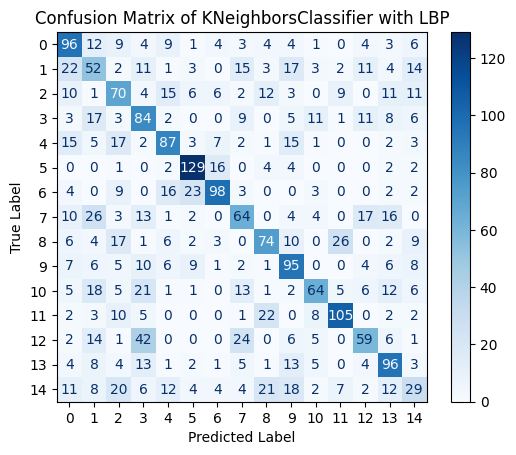

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       160
           1       0.30      0.33      0.31       160
           2       0.40      0.44      0.42       160
           3       0.39      0.53      0.45       160
           4       0.55      0.54      0.55       160
           5       0.70      0.81      0.75       160
           6       0.70      0.61      0.65       160
           7       0.44      0.40      0.42       160
           8       0.51      0.46      0.49       160
           9       0.48      0.59      0.53       160
          10       0.60      0.40      0.48       160
          11       0.68      0.66      0.67       160
          12       0.50      0.37      0.42       160
          13       0.52      0.60      0.56       160
          14       0.28      0.18      0.22       160

    accuracy                           0.50      2400
   macro avg       0.50      0.50      0.50      2400
wei

In [5]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import cv2
from PIL import Image
from skimage.feature import local_binary_pattern

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


def extract_lbp_features(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Error: Unable to read image {image_path}")
            return None
        
        radius = 1
        n_points = 8 * radius
        
        lbp = local_binary_pattern(image, n_points, radius, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= lbp_hist.sum()
        
        return lbp_hist

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None


def load_data_with_lbp(csv_file):
    data = pd.read_csv(csv_file)

    features = []
    labels = []

    for index, row in data.iterrows():
        image_path = row['path_name']
        lbp_feature = extract_lbp_features(image_path)

        if lbp_feature is not None:
            features.append(lbp_feature)
            labels.append(row['class_id'])

    return np.array(features), np.array(labels)


X_train, y_train = load_data_with_lbp('train_data.csv')
X_test, y_test = load_data_with_lbp('test_data.csv')

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of KNeighborsClassifier with LBP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Decision Tree (DT) Classification  
### Augmentation: LBP

Accuracy: 43.00%


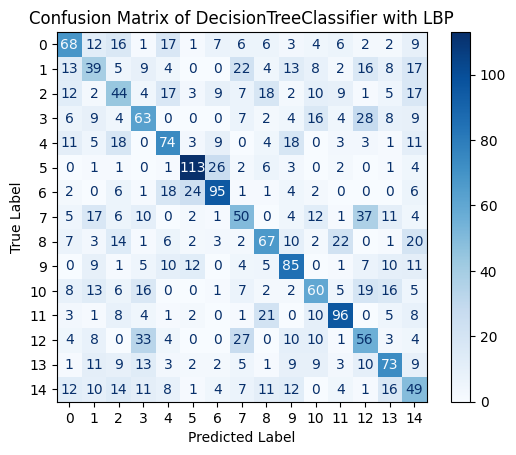

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.42      0.44       160
           1       0.28      0.24      0.26       160
           2       0.29      0.28      0.28       160
           3       0.37      0.39      0.38       160
           4       0.45      0.46      0.46       160
           5       0.68      0.71      0.70       160
           6       0.61      0.59      0.60       160
           7       0.34      0.31      0.32       160
           8       0.45      0.42      0.44       160
           9       0.47      0.53      0.50       160
          10       0.42      0.38      0.40       160
          11       0.60      0.60      0.60       160
          12       0.31      0.35      0.33       160
          13       0.46      0.46      0.46       160
          14       0.27      0.31      0.29       160

    accuracy                           0.43      2400
   macro avg       0.43      0.43      0.43      2400
wei

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import cv2
from skimage.feature import local_binary_pattern

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


def extract_lbp_features(image_path):
  try:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
      print(f"Error: Unable to read image {image_path}")
      return None

    radius = 1
    n_points = 8 * radius

    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(
        0, n_points + 3), range=(0, n_points + 2))

    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= lbp_hist.sum()

    return lbp_hist

  except Exception as e:
    print(f"Error processing {image_path}: {e}")
    return None


def load_data_with_lbp(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']
    lbp_feature = extract_lbp_features(image_path)

    if lbp_feature is not None:
      features.append(lbp_feature)
      labels.append(row['class_id'])

  return np.array(features), np.array(labels)


X_train, y_train = load_data_with_lbp('train_data.csv')
X_test, y_test = load_data_with_lbp('test_data.csv')

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of DecisionTreeClassifier with LBP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Random Forest Classification  
### Augmentation: LBP

Accuracy: 56.50%


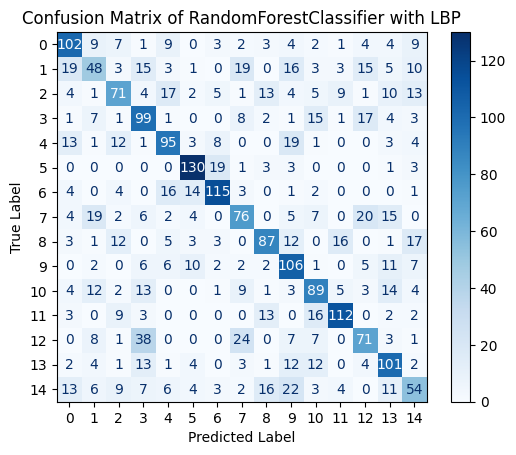

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       160
           1       0.41      0.30      0.35       160
           2       0.53      0.44      0.48       160
           3       0.48      0.62      0.54       160
           4       0.59      0.59      0.59       160
           5       0.74      0.81      0.78       160
           6       0.72      0.72      0.72       160
           7       0.51      0.47      0.49       160
           8       0.62      0.54      0.58       160
           9       0.49      0.66      0.57       160
          10       0.55      0.56      0.55       160
          11       0.74      0.70      0.72       160
          12       0.51      0.44      0.47       160
          13       0.55      0.63      0.59       160
          14       0.42      0.34      0.37       160

    accuracy                           0.56      2400
   macro avg       0.56      0.56      0.56      2400
wei

In [7]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import cv2
from skimage.feature import local_binary_pattern

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


def extract_lbp_features(image_path):
  try:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
      print(f"Error: Unable to read image {image_path}")
      return None

    radius = 1
    n_points = 8 * radius

    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(
        0, n_points + 3), range=(0, n_points + 2))

    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= lbp_hist.sum()

    return lbp_hist

  except Exception as e:
    print(f"Error processing {image_path}: {e}")
    return None


def load_data_with_lbp(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']
    lbp_feature = extract_lbp_features(image_path)

    if lbp_feature is not None:
      features.append(lbp_feature)
      labels.append(row['class_id'])

  return np.array(features), np.array(labels)


X_train, y_train = load_data_with_lbp('train_data.csv')
X_test, y_test = load_data_with_lbp('test_data.csv')

forest = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of RandomForestClassifier with LBP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


80/20 Train-Test Split and CSV Storage

### Imbalance Dataset - Long tail distribution

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data_long_tail.csv')
train_data, test_data = train_test_split(
    data, train_size=0.8, random_state=42, stratify=data['class_id'])
train_data.to_csv('train_data_long_tail.csv', index=False, encoding='utf-8')
test_data.to_csv('test_data_long_tail.csv', index=False, encoding='utf-8')
print('Done!')

print('Number of samples:', data.shape[0])
print('Number of training samples:', train_data.shape[0])
print('Number of testing samples:', test_data.shape[0])
print('Verify the sample distribution')
print('The class values:', set(map(int, test_data.class_id.values)))
print('The distribution of all data:',
      np.bincount(data.class_id.values))
print('The distribution of train data:',
      np.bincount(train_data.class_id.values))
print('The distribution of test data:',
      np.bincount(test_data.class_id.values))

Done!
Number of samples: 2650
Number of training samples: 2120
Number of testing samples: 530
Verify the sample distribution
The class values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
The distribution of all data: [800 400 266 200 160 133 114 100  88  80  72  66  61  57  53]
The distribution of train data: [640 320 213 160 128 106  91  80  70  64  58  53  49  46  42]
The distribution of test data: [160  80  53  40  32  27  23  20  18  16  14  13  12  11  11]


### K-Nearest Neighbors (KNN) Classification  
### Dataset: Imbalanced using long tail
### Augmentation: None

accuracy: 34.15%


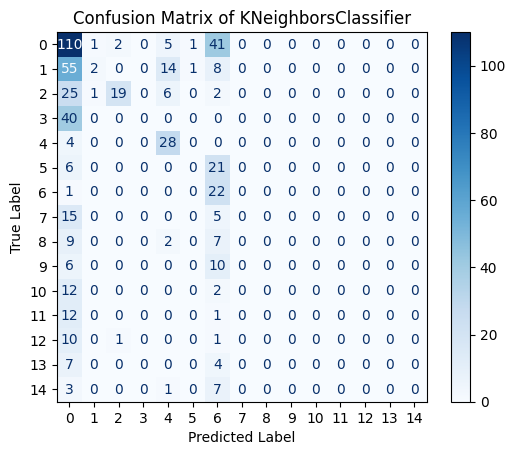

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.69      0.46       160
           1       0.50      0.03      0.05        80
           2       0.86      0.36      0.51        53
           3       0.00      0.00      0.00        40
           4       0.50      0.88      0.64        32
           5       0.00      0.00      0.00        27
           6       0.17      0.96      0.29        23
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11

    accuracy                           0.34       530
   macro avg       0.16      0.19      0.13       530
wei

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of KNeighborsClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Decision Tree (DT) Classification  
### Dataset: Imbalanced using long tail
### Augmentation: None

accuracy: 35.47%


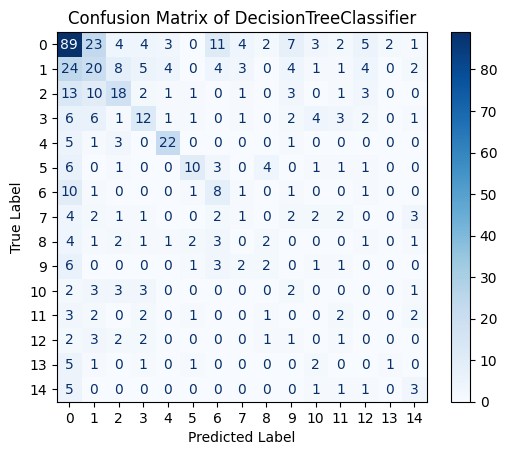

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.56      0.52       160
           1       0.27      0.25      0.26        80
           2       0.42      0.34      0.38        53
           3       0.36      0.30      0.33        40
           4       0.69      0.69      0.69        32
           5       0.56      0.37      0.44        27
           6       0.24      0.35      0.28        23
           7       0.08      0.05      0.06        20
           8       0.17      0.11      0.13        18
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        14
          11       0.13      0.15      0.14        13
          12       0.00      0.00      0.00        12
          13       0.33      0.09      0.14        11
          14       0.21      0.27      0.24        11

    accuracy                           0.35       530
   macro avg       0.26      0.24      0.24       530
wei

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of DecisionTreeClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Random Forest Classification  
### Dataset: Imbalanced using long tail
### Augmentation: None

accuracy: 48.87%


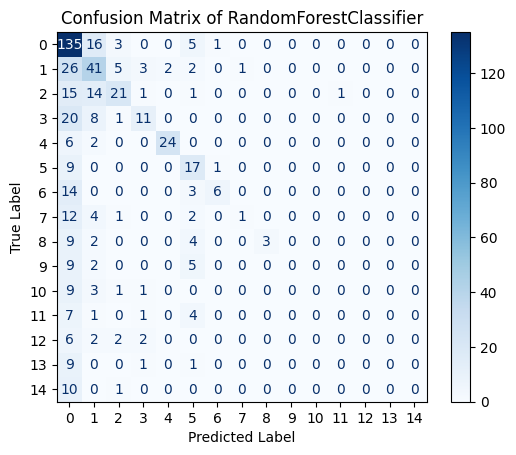

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.84      0.59       160
           1       0.43      0.51      0.47        80
           2       0.60      0.40      0.48        53
           3       0.55      0.28      0.37        40
           4       0.92      0.75      0.83        32
           5       0.39      0.63      0.48        27
           6       0.75      0.26      0.39        23
           7       0.50      0.05      0.09        20
           8       1.00      0.17      0.29        18
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11

    accuracy                           0.49       530
   macro avg       0.37      0.26      0.26       530
wei

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of RandomForestClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Convolutional Neural Network (CNN) Classification using Pytorch
### Dataset: Imbalanced using long tail
### Augmentation: None

Epoch 1/5, Loss: 1.9176
Epoch 2/5, Loss: 1.5062
Epoch 3/5, Loss: 1.2643
Epoch 4/5, Loss: 1.1275
Epoch 5/5, Loss: 1.0138
Test Accuracy: 0.6491


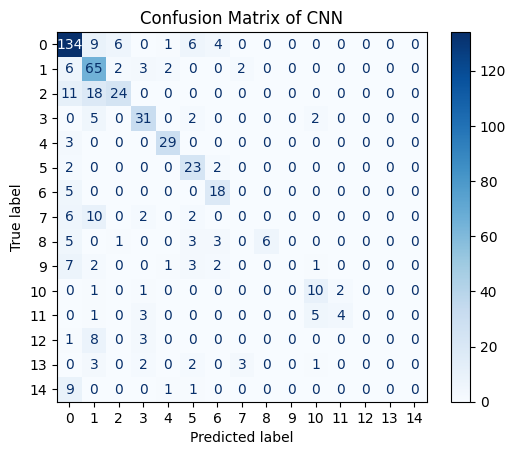

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       160
           1       0.53      0.81      0.64        80
           2       0.73      0.45      0.56        53
           3       0.69      0.78      0.73        40
           4       0.85      0.91      0.88        32
           5       0.55      0.85      0.67        27
           6       0.62      0.78      0.69        23
           7       0.00      0.00      0.00        20
           8       1.00      0.33      0.50        18
           9       0.00      0.00      0.00        16
          10       0.53      0.71      0.61        14
          11       0.67      0.31      0.42        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11

    accuracy                           0.65       530
   macro avg       0.46      0.45      0.43       530
wei

In [18]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from PIL import Image
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


image_size = (256, 256)
num_classes = 15
batch_size = 16
epochs = 5
device = torch.device("cpu")

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


def load_data(csv_file):
  data = pd.read_csv(csv_file)
  features = []
  labels = []

  for _, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size).convert("RGB")
      image_array = transform(image)

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return torch.stack(features), torch.tensor(labels, dtype=torch.long)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(
        128 * (image_size[0] // 8) * (image_size[1] // 8), 128)
    self.fc2 = nn.Linear(128, num_classes)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))
    x = torch.flatten(x, start_dim=1)
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x


model = CNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
  model.train()
  total_loss = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
all_preds, all_labels = [], []

with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    max_values, predicted = torch.max(outputs, 1)

    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of CNN")
plt.show()

report = classification_report(all_labels, all_preds, zero_division=0)
print("Classification Report:")
print(report)


### K-Nearest Neighbors (KNN) Classification  
### Dataset: Imbalanced  
### Augmentation: SMOTE

accuracy: 29.43%


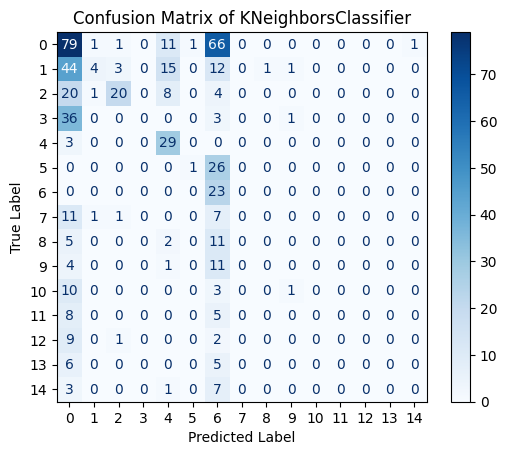

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.49      0.40       160
           1       0.57      0.05      0.09        80
           2       0.77      0.38      0.51        53
           3       0.00      0.00      0.00        40
           4       0.43      0.91      0.59        32
           5       0.50      0.04      0.07        27
           6       0.12      1.00      0.22        23
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11

    accuracy                           0.29       530
   macro avg       0.18      0.19      0.12       530
wei

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train_resampled))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of KNeighborsClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train_resampled).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Decision Tree (DT) Classification  
### Dataset: Imbalanced  
### Augmentation: SMOTE

accuracy: 26.23%


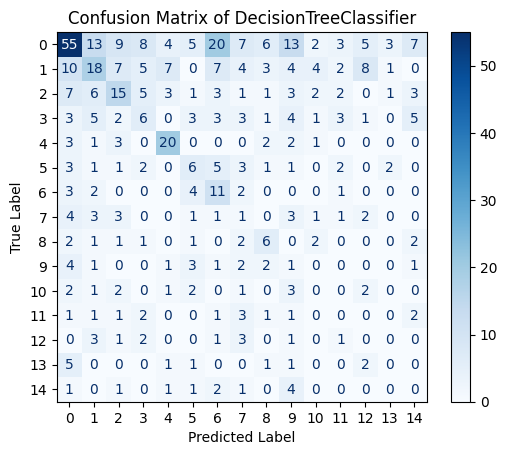

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.34      0.42       160
           1       0.32      0.23      0.26        80
           2       0.33      0.28      0.30        53
           3       0.19      0.15      0.17        40
           4       0.53      0.62      0.57        32
           5       0.21      0.22      0.22        27
           6       0.20      0.48      0.28        23
           7       0.03      0.05      0.04        20
           8       0.25      0.33      0.29        18
           9       0.02      0.06      0.04        16
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11

    accuracy                           0.26       530
   macro avg       0.17      0.18      0.17       530
wei

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_resampled, y_train_resampled)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train_resampled))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of DecisionTreeClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train_resampled).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Random Forest Classification  
### Dataset: Imbalanced  
### Augmentation: SMOTE

accuracy: 51.32%


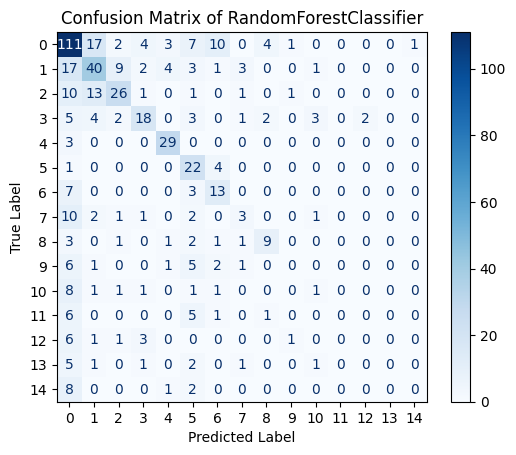

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.69      0.61       160
           1       0.50      0.50      0.50        80
           2       0.60      0.49      0.54        53
           3       0.58      0.45      0.51        40
           4       0.74      0.91      0.82        32
           5       0.38      0.81      0.52        27
           6       0.39      0.57      0.46        23
           7       0.27      0.15      0.19        20
           8       0.56      0.50      0.53        18
           9       0.00      0.00      0.00        16
          10       0.14      0.07      0.10        14
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        11

    accuracy                           0.51       530
   macro avg       0.31      0.34      0.32       530
wei

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

image_size = (256, 256)


def load_data(csv_file):
  data = pd.read_csv(csv_file)

  features = []
  labels = []

  for index, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size)
      image_array = np.array(image).flatten()

      features.append(image_array)
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.unique(y_train_resampled))

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of RandomForestClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

report = classification_report(
    y_test, y_pred, target_names=np.unique(y_train_resampled).astype(str), zero_division=0)

print("Classification Report:")
print(report)


### Convolutional Neural Network (CNN) Classification using Pytorch
### Dataset: Imbalanced  
### Augmentation: SMOTE

C:\Users\09a012\AppData\Local\Temp\ipykernel_388\1979504842.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(
C:\Users\09a012\AppData\Local\Temp\ipykernel_388\1979504842.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))


Epoch 1/5, Loss: 1.5160
Epoch 2/5, Loss: 0.7311
Epoch 3/5, Loss: 0.4455
Epoch 4/5, Loss: 0.2889
Epoch 5/5, Loss: 0.2064
Test Accuracy: 0.6528


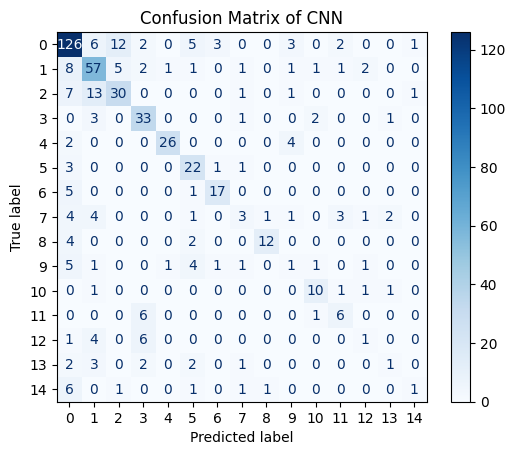

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       160
           1       0.62      0.71      0.66        80
           2       0.62      0.57      0.59        53
           3       0.65      0.82      0.73        40
           4       0.93      0.81      0.87        32
           5       0.56      0.81      0.67        27
           6       0.77      0.74      0.76        23
           7       0.30      0.15      0.20        20
           8       0.86      0.67      0.75        18
           9       0.09      0.06      0.07        16
          10       0.67      0.71      0.69        14
          11       0.46      0.46      0.46        13
          12       0.17      0.08      0.11        12
          13       0.20      0.09      0.12        11
          14       0.33      0.09      0.14        11

    accuracy                           0.65       530
   macro avg       0.53      0.51      0.51       530
wei

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from imblearn.over_sampling import SMOTE

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

image_size = (256, 256)
num_classes = 15
batch_size = 16
epochs = 5
device = torch.device("cpu")

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


def load_data(csv_file):
  data = pd.read_csv(csv_file)
  features = []
  labels = []

  for _, row in data.iterrows():
    image_path = row['path_name']

    try:
      image = Image.open(image_path).resize(image_size).convert("RGB")
      image_array = transform(image)

      features.append(image_array.numpy().flatten())
      labels.append(row['class_id'])

    except Exception as e:
      print(f"Can't handle file: {image_path}, error: {e}")

  return np.array(features), np.array(labels)


X_train, y_train = load_data('train_data_long_tail.csv')
X_test, y_test = load_data('test_data_long_tail.csv')

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_resampled = torch.tensor(y_train_resampled, dtype=torch.long)

X_train_resampled = X_train_resampled.reshape(-1, 3, image_size[0], image_size[1])

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

X_test = X_test.reshape(-1, 3, image_size[0], image_size[1])

train_dataset = torch.utils.data.TensorDataset(
    X_train_resampled, y_train_resampled)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(
    X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(
        128 * (image_size[0] // 8) * (image_size[1] // 8), 128)
    self.fc2 = nn.Linear(128, num_classes)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))
    x = torch.flatten(x, start_dim=1)
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x


model = CNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(epochs):
  model.train()
  total_loss = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader):.4f}")

model.eval()
correct = 0
total = 0
all_preds, all_labels = [], []

with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    max_values, predicted = torch.max(outputs, 1)

    correct += (predicted == labels).sum().item()
    total += labels.size(0)

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix of CNN")
plt.show()

report = classification_report(all_labels, all_preds, zero_division=0)
print("Classification Report:")
print(report)
